In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive'


MyDrive  Shareddrives


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/bottle/train'
test_path = '/content/drive/MyDrive/bottle/test'

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/defective'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


# for i in range(10):
#     print(onlybenignfiles[i])
#     display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

Working with 138 images
Image examples: 


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/bottle/train/*')
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 270 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 4,
                                            class_mode = 'categorical')

Found 52 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(train_set, validation_data=test_set, epochs=10, steps_per_epoch=10, validation_steps=10, callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-85-6a4d7c7a3bea>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_set, validation_data=test_set, epochs=10, steps_per_epoch=10, validation_steps=10, callbacks=callbacks ,verbose=2)


Epoch 1/10

Epoch 1: val_loss improved from inf to 2.70174, saving model to mymodel.h5
10/10 - 82s - loss: 8.8817 - accuracy: 0.4500 - val_loss: 2.7017 - val_accuracy: 0.7250 - 82s/epoch - 8s/step
Epoch 2/10

Epoch 2: val_loss improved from 2.70174 to 2.22444, saving model to mymodel.h5
10/10 - 77s - loss: 2.9228 - accuracy: 0.7000 - val_loss: 2.2244 - val_accuracy: 0.8500 - 77s/epoch - 8s/step
Epoch 3/10

Epoch 3: val_loss improved from 2.22444 to 1.58582, saving model to mymodel.h5
10/10 - 77s - loss: 1.2527 - accuracy: 0.8800 - val_loss: 1.5858 - val_accuracy: 0.9000 - 77s/epoch - 8s/step
Epoch 4/10

Epoch 4: val_loss improved from 1.58582 to 0.79997, saving model to mymodel.h5
10/10 - 79s - loss: 1.0169 - accuracy: 0.8800 - val_loss: 0.8000 - val_accuracy: 0.9250 - 79s/epoch - 8s/step
Epoch 5/10

Epoch 5: val_loss improved from 0.79997 to 0.35379, saving model to mymodel.h5
10/10 - 77s - loss: 0.7487 - accuracy: 0.9400 - val_loss: 0.3538 - val_accuracy: 1.0000 - 77s/epoch - 8s/step

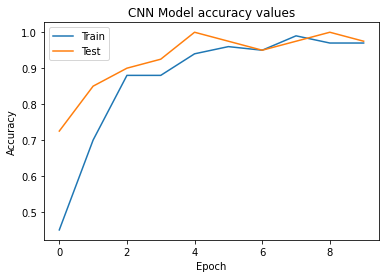

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
print(model_history.history['accuracy'])

[0.44999998807907104, 0.699999988079071, 0.8799999952316284, 0.8799999952316284, 0.9399999976158142, 0.9599999785423279, 0.949999988079071, 0.9900000095367432, 0.9700000286102295, 0.9700000286102295]
